In [6]:
# NAME: Seemin Khan
# ROLL NO.: 20
# UIN: 221P044

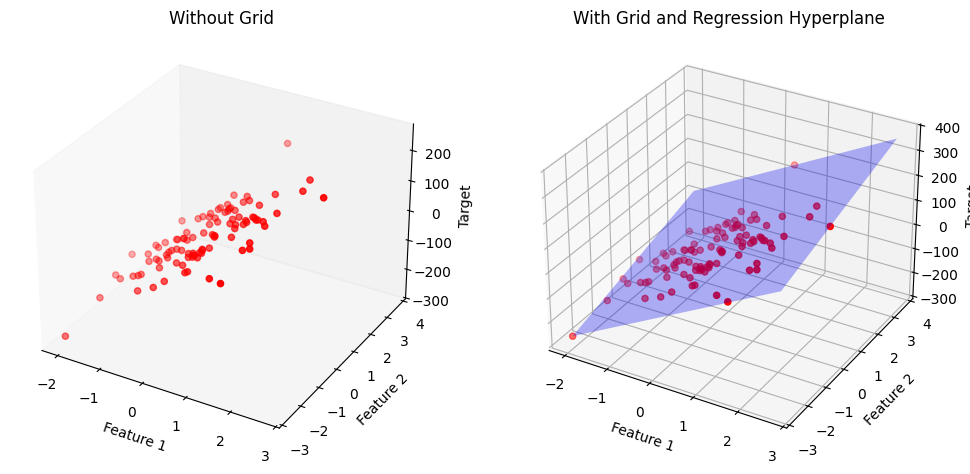

Mean Absolute Error: 0.07
Mean Square Error: 0.01
R² Score: 1.00
Intercept: 0.02, Coefficients: [91.90080557 29.16144541]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Create dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)

# Train, Test, Predict using LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# 3D Scatter Plot without grid
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Target')
ax1.set_title("Without Grid")
ax1.grid(False)  # Disable grid

# 3D Scatter Plot with grid and hyperplane
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Target')
ax2.set_title("With Grid and Regression Hyperplane")
ax2.grid(True)  # Enable grid

# Define the plane (hyperplane) based on the coefficients
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
)
z_surf = reg.intercept_ + reg.coef_[0] * x_surf + reg.coef_[1] * y_surf

# Plot the hyperplane
ax2.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3, rstride=100, cstride=100)

plt.show()

# Calculate errors and r2_score
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Square Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Intercept: {reg.intercept_:.2f}, Coefficients: {reg.coef_}")
